In [1]:
#Import required Libraries
import os
import pandas as pd

#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

import string
import nltk
from nltk.corpus import stopwords

In [2]:
os.listdir()

['training.csv',
 '.DS_Store',
 'Twitter.ipynb',
 'Twitter_Sentiment_Analysis.ipynb',
 '.ipynb_checkpoints',
 'tweets.csv']

In [3]:
Data_cols=['target','ids','date','flag','user','text']
data = pd.read_csv('training.csv',encoding = 'iso-8859-1',names = Data_cols)

In [4]:
data.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


There are no null values

In [6]:
data.duplicated().sum()

0

In [7]:
data['target'].nunique()

2

0 indicates negative and 4 indicates positive tweets

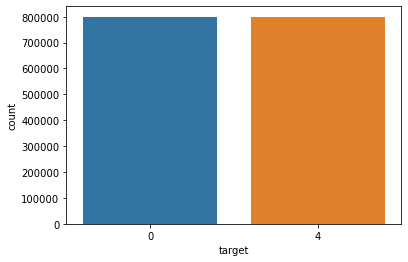

In [8]:
sns.countplot(data['target'])

In [9]:
with pd.option_context('display.max_colwidth', None):
    print(data['text'][:10])

0    @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D
1        is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!
2                              @Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds
3                                                                        my whole body feels itchy and like its on fire 
4        @nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. 
5                                                                                          @Kwesidei not the whole crew 
6                                                                                                            Need a hug 
7                    @LOLTrish hey  long time no see! Yes.. Rains a bit ,only a bit  LOL , I'm fine thanks , how's you ?
8                               

In [10]:
tweets_df = data[['text']][:100]
tweets_df.head()
#tweets_df['text'].nunique()

,text
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,is upset that he can't update his Facebook by ...
2,@Kenichan I dived many times for the ball. Man...
3,my whole body feels itchy and like its on fire
4,"@nationwideclass no, it's not behaving at all...."


## New data for ML model

In [11]:
df_new = data[['text','target']]

In [12]:
df_new.head()

,text,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [13]:
df1 = df_new.loc[df_new['target'] == 0][:20000]

In [14]:
df2 = df_new.loc[df_new['target'] == 4][:20000]

In [15]:
df = pd.concat([df1,df2], axis = 0)

In [16]:
df['target'] = df['target'].replace({4:1})

In [17]:
df.head()

,text,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 819999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    40000 non-null  object
 1   target  40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 937.5+ KB


In [19]:
df['target'].nunique()

2

## DATA CLEANING

Write a function to remove: 
punctuation,stop words, hashtags, email id's,urls, numbers ,@usernames, emoticons,languages other than english, retweets etc

In [20]:
from string import punctuation
import re

In [21]:
# To check the list of stop words 
stops = set(stopwords.words('english'))
print (stops)

{'we', 'were', 'me', 'some', 'have', 'once', "should've", "didn't", 'ain', "couldn't", 'if', 'ours', "weren't", 'myself', 'more', 'just', 'having', 'you', 'haven', "you'll", 'all', 'been', 'doing', 've', 'then', 'needn', 'yourself', 'am', 'ourselves', 'their', 'off', 'yours', 'again', 'through', 'during', 'such', "needn't", 't', 'there', "hasn't", 'wouldn', 'further', 'of', 'hasn', 'to', 'few', 'on', 'under', 'above', 'couldn', 'those', 'whom', 'over', 'she', 'now', 'that', 're', 'themselves', 'into', 'is', 'who', 'until', "mightn't", 'd', 'your', 'did', 'after', 'didn', "she's", 'will', 'where', 'mightn', 'before', 'hadn', 'but', 'why', 'these', 'them', 'her', "you've", 'can', 'or', 'no', 'how', 'when', 'both', 'with', "mustn't", "wouldn't", 'does', 'are', 'i', 'has', 'aren', "it's", "doesn't", 'his', 'it', 'and', 'isn', 'which', 'wasn', 'about', "aren't", 'here', 'than', 'theirs', 'hers', "wasn't", 'below', 'the', "you'd", 'up', 'shouldn', "you're", 'each', 'don', 'against', 'so', 'n

In [22]:
wn = nltk.WordNetLemmatizer()

In [23]:
def clean_tweet(tweet):
    temp = tweet.lower()
    temp = re.sub('(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)',' ',temp) #To remove @ and # words
    temp = re.sub('(\w+:\/\/\S+)|(0-9A-Za-z \t)',' ',temp) #To remove urls and numbers
    temp = re.sub('[RT]|(;[A-Za-z])',' ',temp) #To remove Re-tweets and text emoticons
    temp = [char for char in temp if char not in string.punctuation] #To remove punctuation
    temp = ''.join(temp)
    temp =  [word for word in temp.split() if word not in stopwords.words('english')] #To remove stopwords and return a list of words(tokenize)
    temp = [wn.lemmatize(word) for word in temp]
    #temp = ' '.join(temp)
    return temp    

In [24]:
print(data['text'][0],"\n")
k = clean_tweet(data['text'][0])
print(k)

@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D 

['awww', 'thats', 'bummer', 'shoulda', 'got', 'david', 'carr', 'third', 'day']


In [25]:
tweets_df['text'] = tweets_df['text'].apply(clean_tweet)

In [26]:
tweets_df.head()

,text
0,"[awww, thats, bummer, shoulda, got, david, car..."
1,"[upset, cant, update, facebook, texting, might..."
2,"[dived, many, time, ball, managed, save, 50, r..."
3,"[whole, body, feel, itchy, like, fire]"
4,"[behaving, im, mad, cant, see]"


In [27]:
#Need to add code to remove emoticons or consider them
#Change stop words like should'nt to should not

In [28]:
df1['text'] = df1['text'].apply(clean_tweet)

In [29]:
df1.head()

,text,target
0,"[awww, thats, bummer, shoulda, got, david, car...",0
1,"[upset, cant, update, facebook, texting, might...",0
2,"[dived, many, time, ball, managed, save, 50, r...",0
3,"[whole, body, feel, itchy, like, fire]",0
4,"[behaving, im, mad, cant, see]",0


## Twitter Sentiment Analysis 

In [33]:
### Splitting the data into train and test

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test,y_train,y_test = train_test_split(df['text'],df['target'],test_size = 0.2)

In [27]:
X_train.head()

803329    @onmejack a lot of people say they can't run b...
16984     I cannot believe, after six years, Wilmington ...
816855    is going to spend this beautiful day God has m...
793       went to ihop again. Great for a diet   At leas...
11312     i can't believe this cough!! i've had it for t...
Name: text, dtype: object

In [28]:
X_train = X_train.reset_index(drop=True)

In [29]:
X_test = X_test.reset_index(drop=True)

In [30]:
y_train.head()

803329    1
16984     0
816855    1
793       0
11312     0
Name: target, dtype: int64

In [31]:
y_train = y_train.reset_index(drop=True)

In [32]:
y_test = y_test.reset_index(drop=True)

In [33]:
### Vectorizing

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
tf = TfidfVectorizer(analyzer = clean_tweet)
vect_fit = tf.fit(X_train)

train_transf = vect_fit.transform(X_train)
test_transf = vect_fit.transform(X_test)

X_train_vect = pd.DataFrame(train_transf.toarray())
X_test_vect = pd.DataFrame(test_transf.toarray())

X_train_vect.head()

,0,1,2,3,4,5,6,7,8,9,...,29063,29064,29065,29066,29067,29068,29069,29070,29071,29072
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
X_test_vect.head()

,0,1,2,3,4,5,6,7,8,9,...,29063,29064,29065,29066,29067,29068,29069,29070,29071,29072
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
print(X_train.shape)
print(X_test.shape)

(32000,)
(8000,)


In [38]:
y_test.nunique()

2

In [39]:
### ML MODEL - Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [41]:
def Print_results(results):
    print('Best Params: {} \n'.format(results.best_params_))
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean,std,params in zip(means,stds,results.cv_results_['params']):
        print('{}(+/-{}) for {}'.format(round(mean,3),round(std*2,3),params))

In [47]:
LR = LogisticRegression()
params = {'C':[1]}
LR_cv = GridSearchCV(LR, params, cv=5)
LR_cv.fit(X_train_vect,y_train)
Print_results(LR_cv)

Best Params: {'C': 1} 

0.748(+/-0.007) for {'C': 1}


In [48]:
import time
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score,recall_score,precision_score

In [49]:
def evaluate_model(name,model,features,labels):
    start = time.time()
    pred = model.predict(features)
    end = time.time()
    accuracy = round(accuracy_score(labels,pred),3)
    precision = round(precision_score(labels,pred),3)
    recall = round(recall_score(labels,pred),3)
    print('{}--Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,accuracy,precision,
                                                                                recall,round((end-start),3)))

In [50]:
evaluate_model('LogisticRegression',LR_cv,X_test_vect,y_test)

LogisticRegression--Accuracy: 0.746 / Precision: 0.737 / Recall: 0.763 / Latency: 1.778ms
